# Check SED table

In [1]:
import numpy as np

%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd


/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from astropy.io import fits

In [20]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

- Atmosphere_hd158485_grat_0509_run_5_2-25.fits
- Atmosphere_hd158485_grat_0510_run_6_2-13.fits
- Atmosphere_hd158485_grat_0511_run_1_103-112.fits
- Atmosphere_hd158485_grat_0511_run_2_52-71.fits
- Atmosphere_hd158485_grat_0511_run_3_22-31.fits 
- Atmosphere_hd158485_grat_0511_run_4_7-16.fits
- RMSToAverSpectrumLin__hd158485_grat_0509_run_5_2-25.fits
- RMSToAverSpectrumLin__hd158485_grat_0510_run_6_2-13.fits
- RMSToAverSpectrumLin__hd158485_grat_0511_run_1_103-112.fits
- RMSToAverSpectrumLin__hd158485_grat_0511_run_2_52-71.fits
- RMSToAverSpectrumLin__hd158485_grat_0511_run_3_22-31.fits
- RMSToAverSpectrumLin__hd158485_grat_0511_run_4_7-16.fits
- RatioSpectrumLin_hd158485_grat_0509_run_5_2-25.fits
- RatioSpectrumLin_hd158485_grat_0510_run_6_2-13.fits
- RatioSpectrumLin_hd158485_grat_0511_run_1_103-112.fits
- RatioSpectrumLin_hd158485_grat_0511_run_2_52-71.fits
- RatioSpectrumLin_hd158485_grat_0511_run_3_22-31.fits
- RatioSpectrumLin_hd158485_grat_0511_run_4_7-16.fits

In [3]:
RatioSpectrum_File_list= ['RatioSpectrumLin_hd158485_grat_0511_run_1_103-112.fits', 
                          'RatioSpectrumLin_hd158485_grat_0511_run_2_52-71.fits',
                          'RatioSpectrumLin_hd158485_grat_0511_run_3_22-31.fits',
                          'RatioSpectrumLin_hd158485_grat_0511_run_4_7-16.fits',
                          'RatioSpectrumLin_hd158485_grat_0509_run_5_2-25.fits',
                          'RatioSpectrumLin_hd158485_grat_0510_run_6_2-13.fits'
                         ]

In [10]:
wl_list = []
ratio_list = []
for file in RatioSpectrum_File_list:
    #print file
    hdulist=fits.open(file)
    hdulist.info()
    table_data=hdulist[1].data
    print table_data.columns
    wl_array=table_data['Wavelength']
    ratio_array=table_data['RatioSpectra']
    wl_list.append(wl_array)
    ratio_list.append(ratio_array)
    hdulist.close()

Filename: RatioSpectrumLin_hd158485_grat_0511_run_1_103-112.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU     12   1460R x 2C   [E, E]   
ColDefs(
    name = 'Wavelength'; format = 'E'
    name = 'RatioSpectra'; format = 'E'
)
Filename: RatioSpectrumLin_hd158485_grat_0511_run_2_52-71.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU     12   1460R x 2C   [E, E]   
ColDefs(
    name = 'Wavelength'; format = 'E'
    name = 'RatioSpectra'; format = 'E'
)
Filename: RatioSpectrumLin_hd158485_grat_0511_run_3_22-31.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU     12   1460R x 2C   [E, E]   
ColDefs(
    name = 'Wavelength'; format = 'E'
    name = 'RatioSpectra'; format = 'E'
)
Filename: RatioSpect

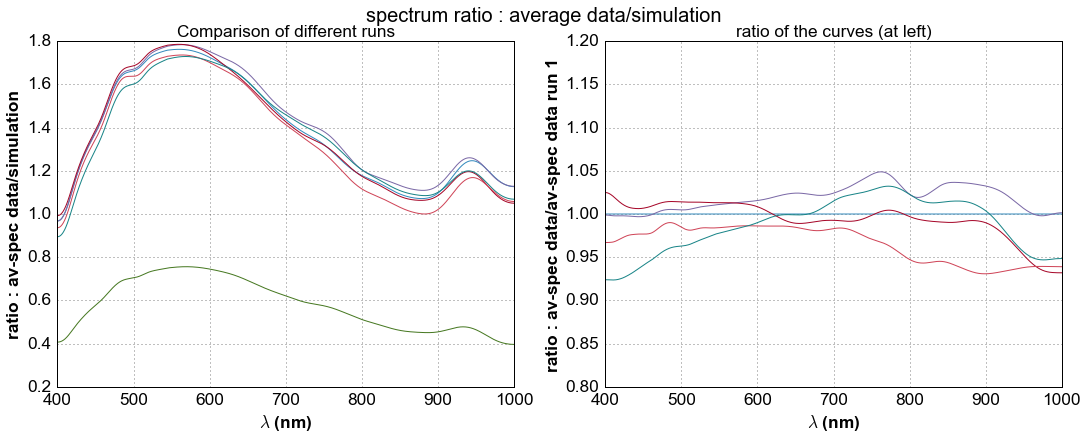

In [26]:
figname='ratioration.pdf'
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(1,2, sharex=True,figsize=(18,6))


for idx,ratio in enumerate(ratio_list):
    axarr[0].plot(wl_list[idx],ratio)
    axarr[0].set_title('Comparison of different runs')
    axarr[0].set_xlabel('$\lambda$ (nm)')
    axarr[0].set_ylabel('ratio : av-spec data/simulation')
for idx,ratio in enumerate(ratio_list):
    axarr[1].plot(wl_list[idx],ratio/ratio_list[0])
    axarr[1].set_ylim(0.8,1.2) 
    axarr[1].set_title('ratio of the curves (at left)')
    axarr[1].set_xlabel('$\lambda$ (nm)')
    axarr[1].set_ylabel('ratio : av-spec data/av-spec data run 1')  
plt.suptitle('spectrum ratio : average data/simulation' ,fontsize=20)

plt.savefig(figname)    